In [128]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [129]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

We have followed below steps for our analysis and model preparation.

1. Reading and Inspect The Dataset
 - 1.1 Import and Read
 - 1.2 Inspect the dataframe
2. Data Cleaning and Data Preparation
 - 2.1 Inspect Null values
 - 2.2 Check for Duplicate Values
 - 2.3 Rename Columns with meaningful Names
 - 2.4 Drop Less Significant Columns
 - 2.5 Filter High-value Customers
 - 2.6 Tag Churners
 - 2.7 Drop all features related to month 9 (churn phase)
 - 2.8 Handle Missing Values
 - 2.9 EDA
 - 2.10 Outlier Treatment
 - 2.11 Derived Features
 - 2.11 Create Dummy Variables
 - 2.12 Train-Test Split
 - 2.13 Feature Scaling
 - 2.14 Handling Imbalanced Dataset
3. Model Building
 - 3.1 Logistic Regression
 - 3.2 Decision Tree
 - 3.3 Random Forest

# 1. Read and Inspect The Dataset

## 1.1 Import and Read

In [130]:
data = pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## 1.2 Inspect The Dataframe

Inspecting the dataframe's columns, shapes, variable types etc.

In [131]:
#Checking details of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [132]:
#determine the shape of the dataframe (no of rows*no of columns)
data.shape

(99999, 226)

In [133]:
#get the statistical description of the data
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### Observation:
- There are 99999 rows and 226 columns
- Out  of 226 columns, there are 214 columns which are numerical variables hence their statistics are visible
- 179 variables with float datatype, 35 variables with int datatype and 12 variables with object datatype

# 2. Data Cleaning and Data Preparation

## 2.1 Inspect Null Values

In [134]:
#Checking for null values
round(100*data.isnull().sum()/len(data.index),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

There are huge percentage of missing values in the dataset. So let's handle the missing values.

## 2.2 Check for Duplicates

In [135]:
# check for duplicate values in mobile_number
sum(data.duplicated(subset='mobile_number')) ==0

True

#### Observation:
- No duplicate values in mobile_number

## 2.3 Rename Columns with meaningful Names

In [136]:
data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'},
            inplace=True)

## 2.4 Drop Less Significant Columns

In [137]:
# mobile_number is an id column, so add to the list of columns to be dropped
col_to_drop = ['mobile_number']
# Check columns which contains single values
for col in data.columns:
    if data[col].nunique() == 1:
        col_to_drop.append(col)
col_to_drop

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [138]:
# Remove the columns present in col_to_drop
data = data.drop(col_to_drop,axis=1)
data.shape

(99999, 209)

## 2.5 Filter High-value Customers

As mentioned, we need to predict churn only for high-value customers. 
We have to define high-value customers as follows: 
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
- After filtering the high-value customers, we should get about 30k rows.

In [139]:
#Calculate Mobile Internet Recharge Amount for month 6 and 7
data['total_data_rech_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']

#Calculate Total Recharge Amount for month 6 and 7
data['amt_data_6'] = data[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
data['amt_data_7'] = data[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

#Calculate Average Recharge Amount of each customer during Good Phase
data['AVG_amt_data_6_7'] = data[['amt_data_6','amt_data_7']].mean(axis=1)

data = data[data['AVG_amt_data_6_7'] >= data['AVG_amt_data_6_7'].quantile(0.7)]
data = data.drop(['total_data_rech_6','total_data_rech_7', 'amt_data_6', 'amt_data_7', 'AVG_amt_data_6_7'], axis=1)
data.shape

(30001, 209)

#### Observation:
##### We have filtered out high values customers by calculating 70th percentile of the average recharge amount in the first two months (the good phase).

#### After filtering the high-value customers, we are getting 30001 rows.

## 2.6 Tag Churners

To tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

We will derive a new column 'churn' where values would be either 1(churn) or 0(non-churn)
 - Usage Based Churn.
 - 9th Month is our churn based customer

In [140]:
# Mark the customers as churn if the sum of the total mou and vol of 9 month is 0
tag_churn_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
data['churn'] = np.where(data[tag_churn_cols].sum(axis=1) == 0, 1, 0 )

In [141]:
# Check Churn and non-churn percentage
round(data['churn'].value_counts(normalize=True)*100,2)

0    91.86
1     8.14
Name: churn, dtype: float64

#### Observation:
Churn rate is 8.14% and non-churn rate is 91.86%. This shows there is class imbalance in the data.We will handle class imbalance after train-test split

## 2.7 Drop all features related to month 9 (churn phase)


We have to drop all attributes having ‘_9’ and 'sep', etc. in their names because we will predict churn/non-churn on data from the 1st 3 months

In [142]:
data = data.drop(data.filter(regex='_9',axis=1).columns, axis=1)
data.shape

(30001, 158)

## 2.8 Handle Missing Values

In [143]:
round(100*data.isnull().sum()/len(data.index),2)

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.82
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.82
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_mou_6                 1.82
loc_og_mou_7                 1.79
loc_og_mou_8  

#### Observation:
The missing percentages are same for various columns related to mobile internet recharge. It may indicate that those customers have not done any mobile internet recharge. Let's check those columns and impute those values with zero.

### 2.8.1 Impute Missing Values

Null value in columns related to mobile internet related columns like total data recharge, av_rech_amt_data,max_rech_data indicates that customer has not done additional data recharge for those months and minimum value is 1 so we can impute null values by 0 amount considering there were no recharges done by the customer.

In [144]:
# Check Columns associated with Mobile Internet for month 6
data[data['total_rech_data_6'].isnull()][['max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
                                          'arpu_3g_6', 'arpu_2g_6']].nunique()

max_rech_data_6       0
count_rech_2g_6       0
count_rech_3g_6       0
av_rech_amt_data_6    0
arpu_3g_6             0
arpu_2g_6             0
dtype: int64

In [145]:
# Check Columns associated with Mobile Internet for month 7
data[data['total_rech_data_7'].isnull()][['max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7',
                                          'arpu_3g_7', 'arpu_2g_7']].nunique()

max_rech_data_7       0
count_rech_2g_7       0
count_rech_3g_7       0
av_rech_amt_data_7    0
arpu_3g_7             0
arpu_2g_7             0
dtype: int64

In [146]:
# Check Columns associated with Mobile Internet for month 8
data[data['total_rech_data_8'].isnull()][['max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
                                          'arpu_3g_8', 'arpu_2g_8']].nunique()

max_rech_data_8       0
count_rech_2g_8       0
count_rech_3g_8       0
av_rech_amt_data_8    0
arpu_3g_8             0
arpu_2g_8             0
dtype: int64

#### Observation:
It is evident that the missing values in mobile internet related columns are because the customers have not bought any mobile internet service. So let's impute those values with zeros.

Imputing null value by 0 

In [147]:
cols_zero_impute = ['total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
                    'arpu_3g_6', 'arpu_2g_6', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7',
                    'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 'total_rech_data_8','max_rech_data_8', 'count_rech_2g_8', 
                    'count_rech_3g_8', 'av_rech_amt_data_8','arpu_3g_8', 'arpu_2g_8']
data[cols_zero_impute] = data[cols_zero_impute].fillna(0)

In [148]:
# Check Missing Value Percentages in Each Column
round(100*data.isnull().sum()/len(data.index),2)

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.82
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.82
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_mou_6                 1.82
loc_og_mou_7                 1.79
loc_og_mou_8  

### 2.8.2 DropThe Columns with High Percentage of Missing Values

In [149]:
for col in data.columns:
    if(100*data[col].isnull().sum()/len(data.index) >= 40):
        data.drop(col, 1, inplace=True)

In [150]:
# Converting date columns to datetime format
data['date_of_last_rech_6'] = pd.to_datetime(data['date_of_last_rech_6']).dt.day
data['date_of_last_rech_7'] = pd.to_datetime(data['date_of_last_rech_7']).dt.day
data['date_of_last_rech_8'] = pd.to_datetime(data['date_of_last_rech_8']).dt.day

### 2.8.3 Imputing missing observations with Median

In [151]:
missing_cols = data.columns[data.isnull().sum()>0]
for col in missing_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [152]:
# Check Missing Value Percentages in Each Column
round(100*data.isnull().sum()/len(data.index),2)

arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
std_og_t2f_mou_6       0.0
s

#### Observation:
Now the dataset is clean and there are no missing values.

## 2.9 EDA

Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

In [153]:
# lets write a function to plot historgram for some sample columns
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [154]:
# function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [155]:
# function to plot scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [156]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = data
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [157]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

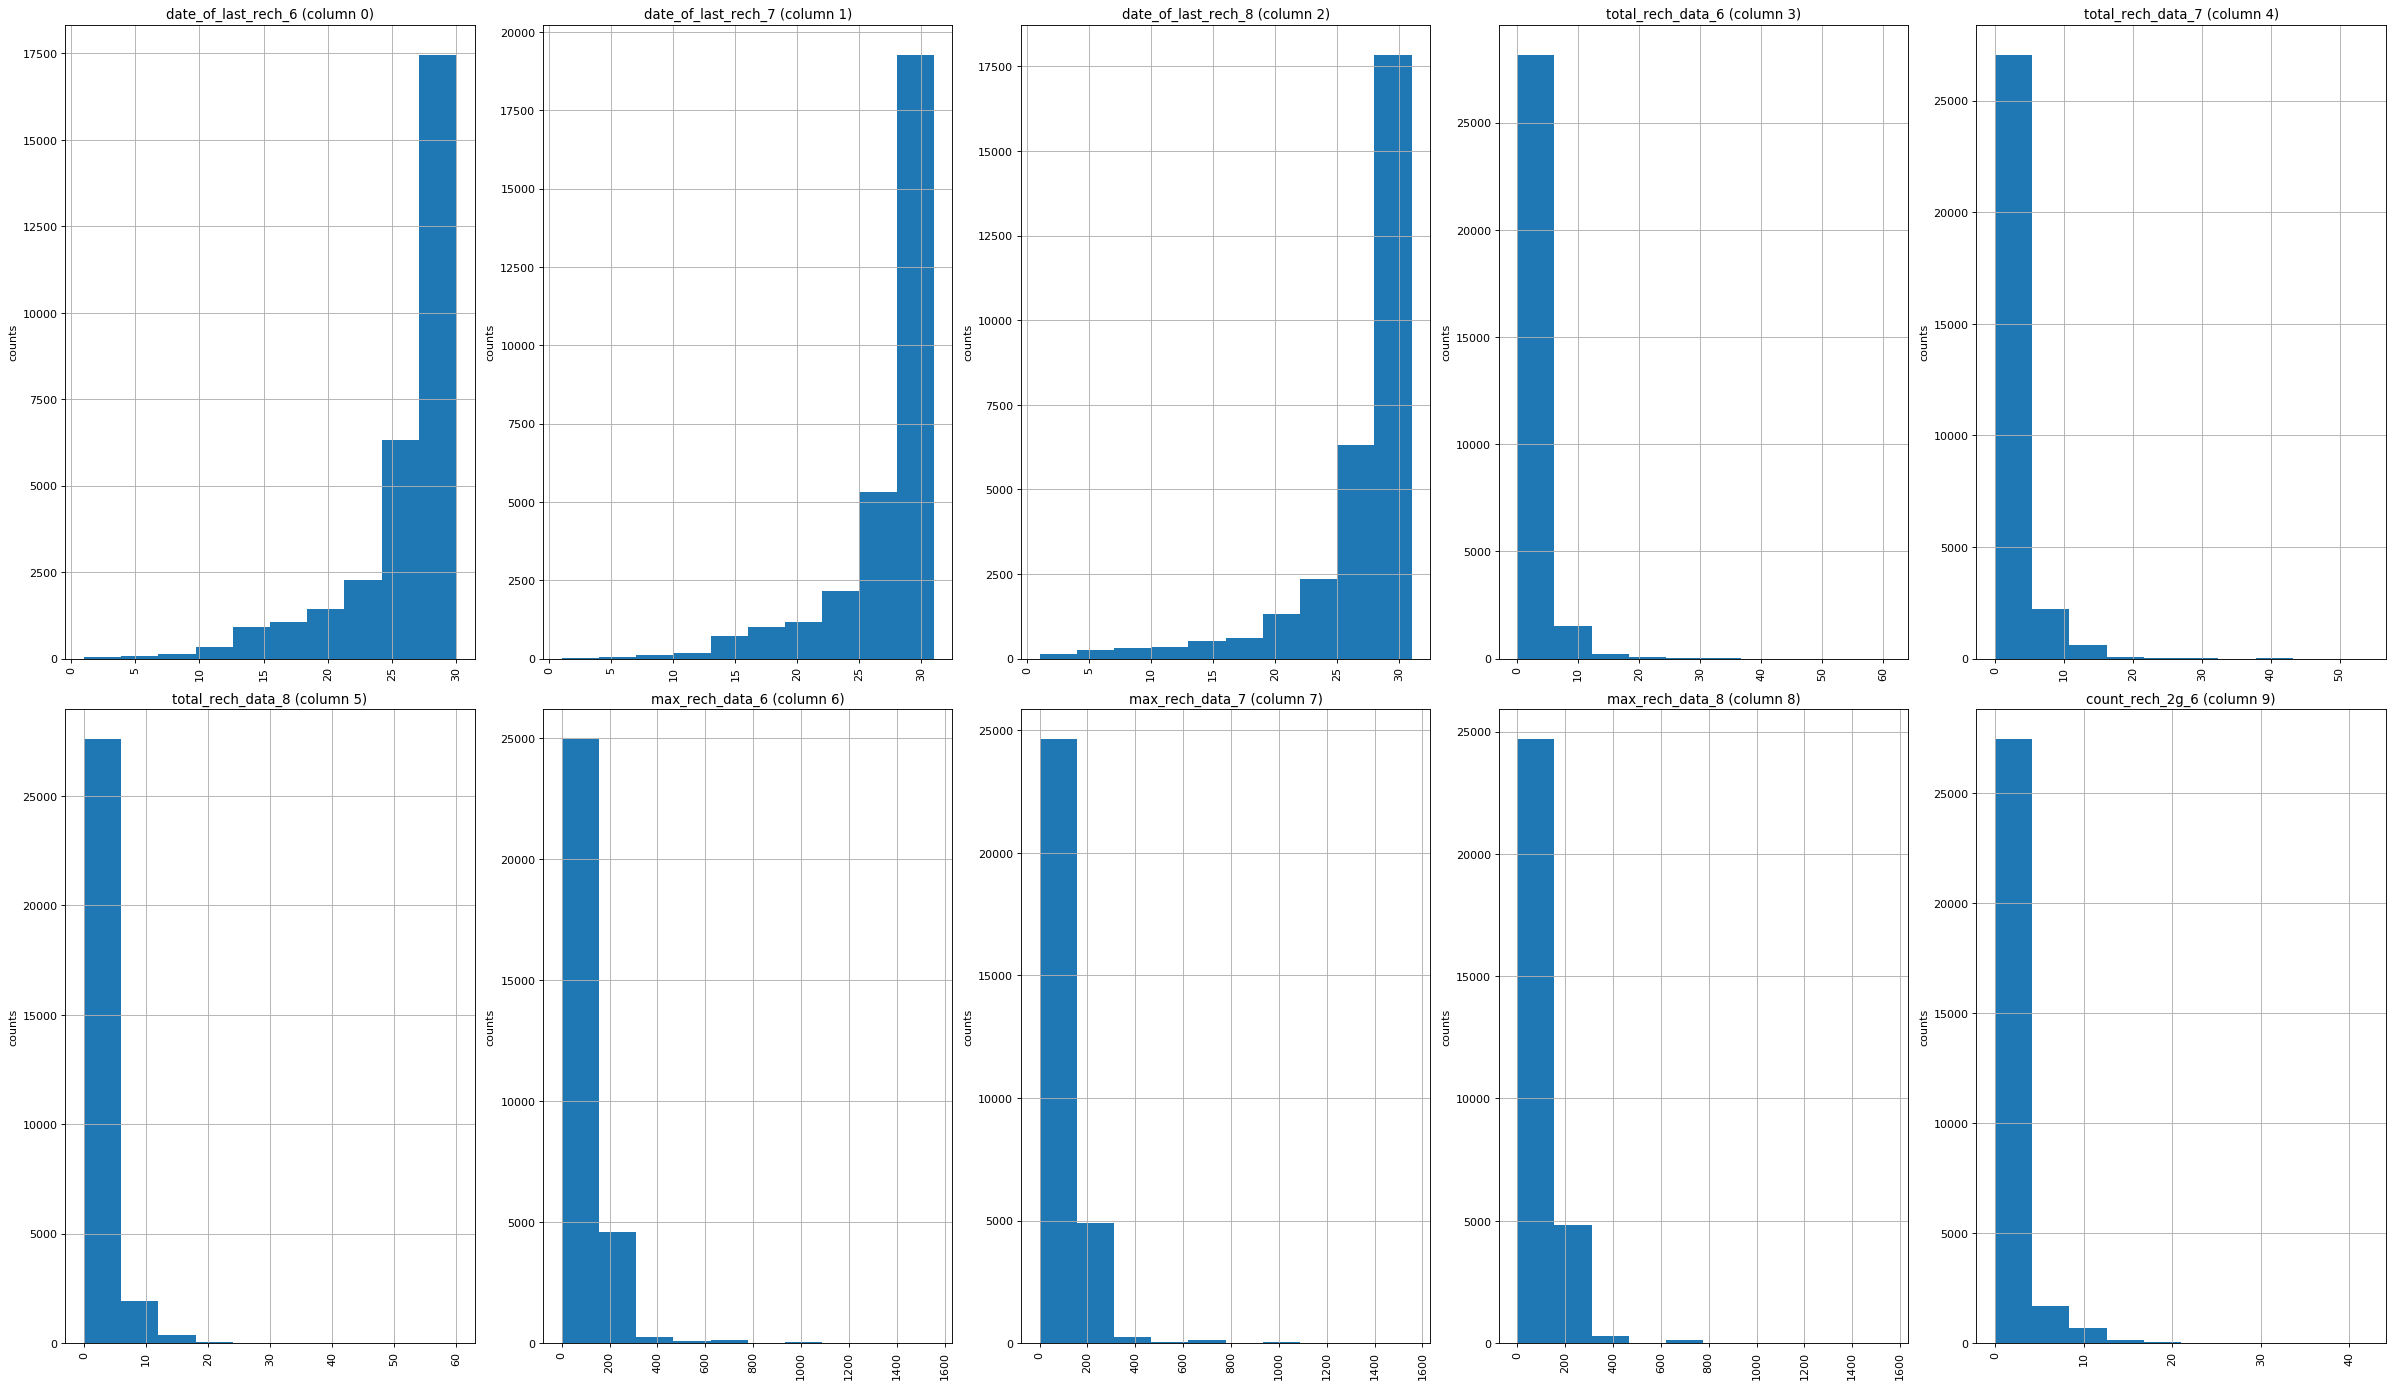

In [158]:
# call the function to plot the graphs
plotPerColumnDistribution(data, 10, 5)

### 2.9.1 Features related to rech_amt

In [161]:
#Identifying features related to amount
data.columns[data.columns.str.contains('amt')]

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')

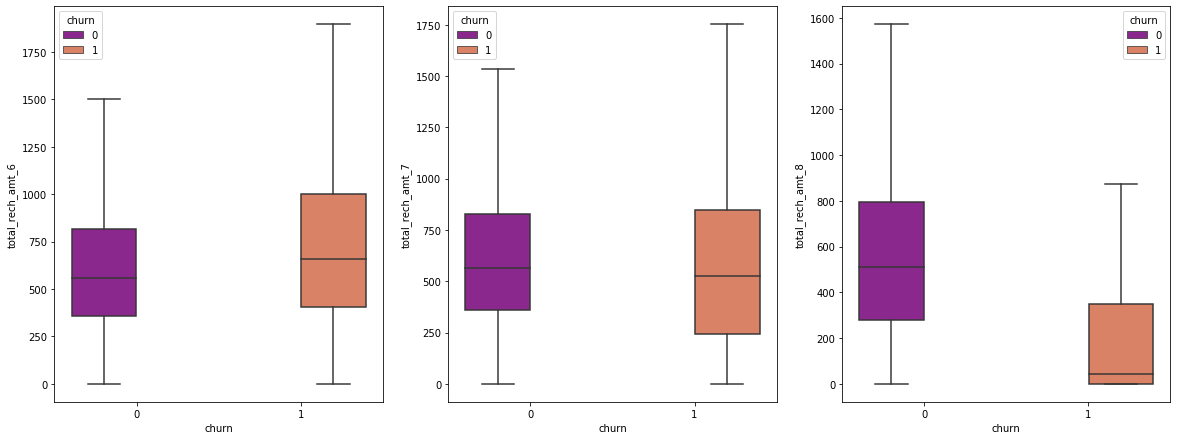

In [162]:
# Ploting for total recharge amount for 6th, 7th and 8th month
plot_box_chart('total_rech_amt')

#### Observation:

We can observe that <b> 'total_rech_amt' (total_rech_amt) </b> for churned customers decreases extensively during 8th Month ie. Action Phase which also goes with our observation that the customer experience starts to sore in this phase for churned customers.

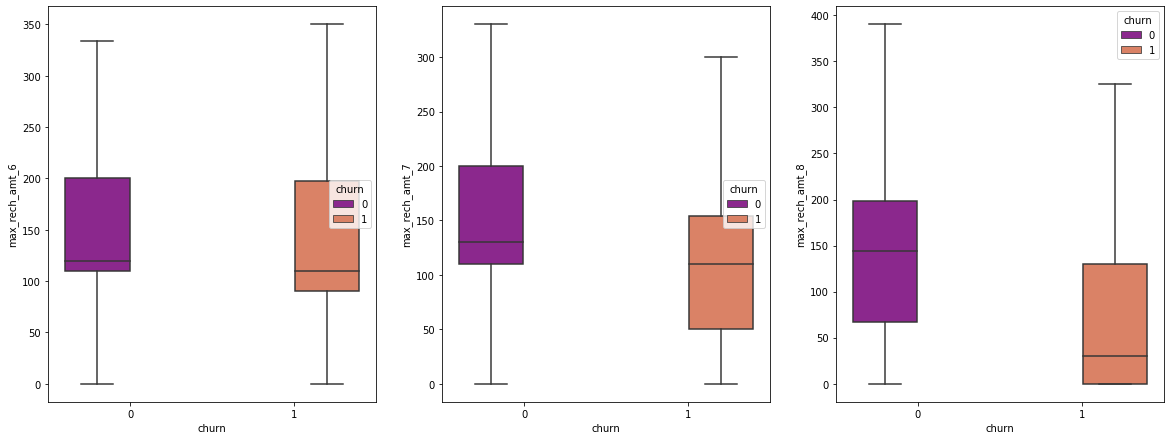

In [164]:
# Plot for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

#### Observation:
We can observe that there is significant decrease in <b> maximum recharge amount (max_rech_amt) </b> for data in the 8th month (action phase) for churned customers.

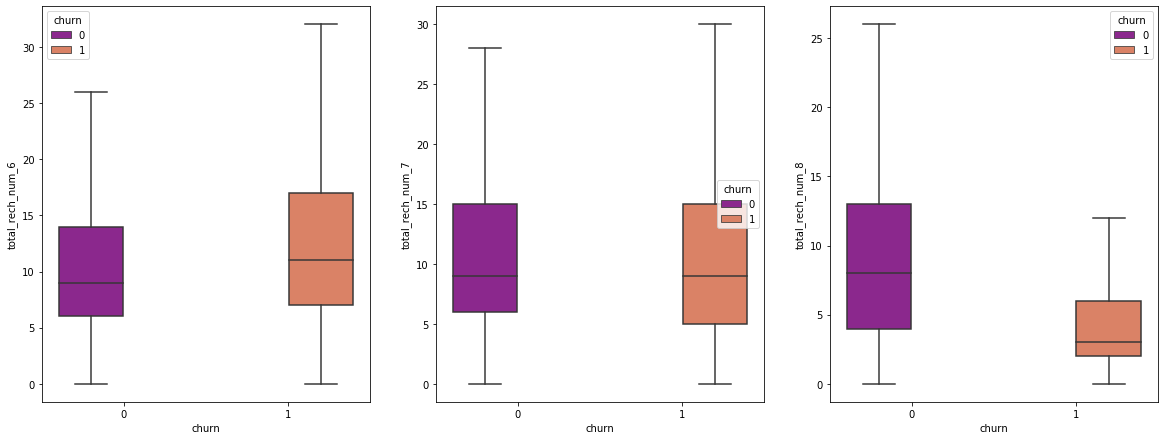

In [163]:
# Plot for Total recharge for Number:
plot_box_chart('total_rech_num')

#### Observation:

We can observe that <b> total recharge number (total_rech_num) </b>for churned customers decreases extensively during 8th Month ie. Action Phase which also goes with our observation that the customer experience starts to sore in this phase for churned customers.

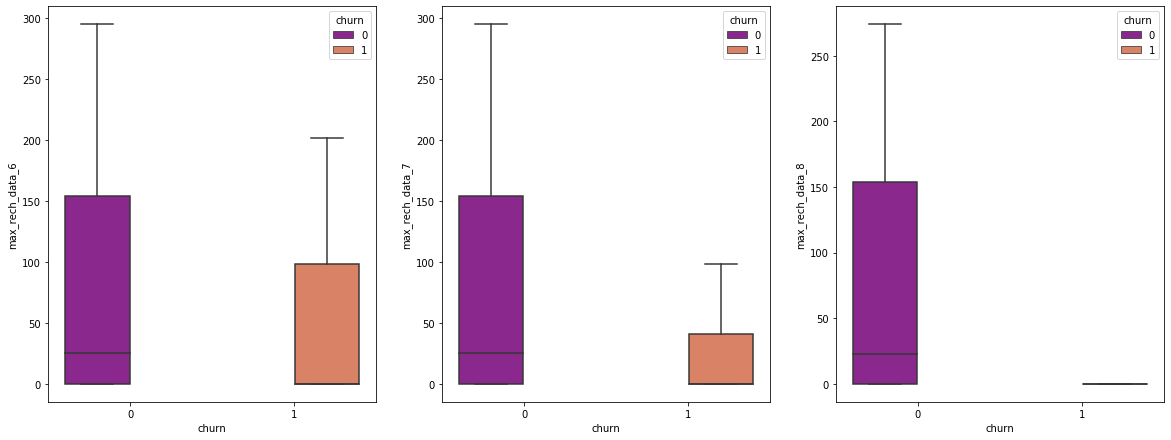

In [165]:
# Plot for maximum recharge for data:
plot_box_chart('max_rech_data')

#### Observation:

We can observe that <b>'max_rech_data'</b> for churned customers decreases extensively during 8th Month ie. Action Phase which also goes with our observation that the customer experience starts to sore in this phase for churned customers.

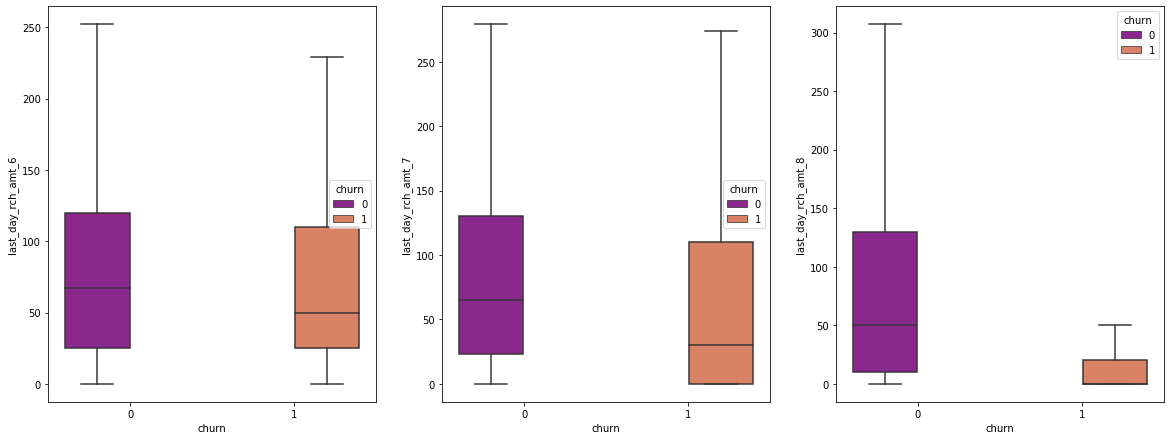

In [166]:
# Plot for last day recharge amount:
plot_box_chart('last_day_rch_amt')

#### Observation:

We can observe that <b>'last_day_rch_amt'</b> for churned customers decreases extensively during 8th Month ie. Action Phase which also goes with our observation that the customer experience starts to sore in this phase for churned customers.

### 2.9.2 Features related to 2g and 3g

Analysing 2g and 3g related attributes

In [168]:
#Identifying features related to 2g and 3g
usage_data_2g_3g = data.columns[data.columns.str.contains('2g|3g',regex=True)]
usage_data_2g_3g

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

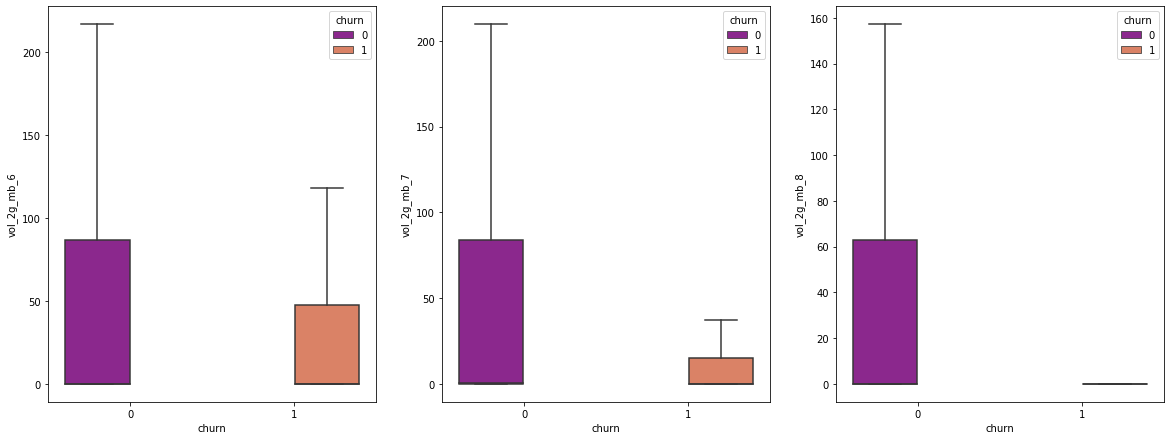

In [169]:
# Plot vol_2g_mb (volume of 2G) usage column
plot_box_chart('vol_2g_mb')

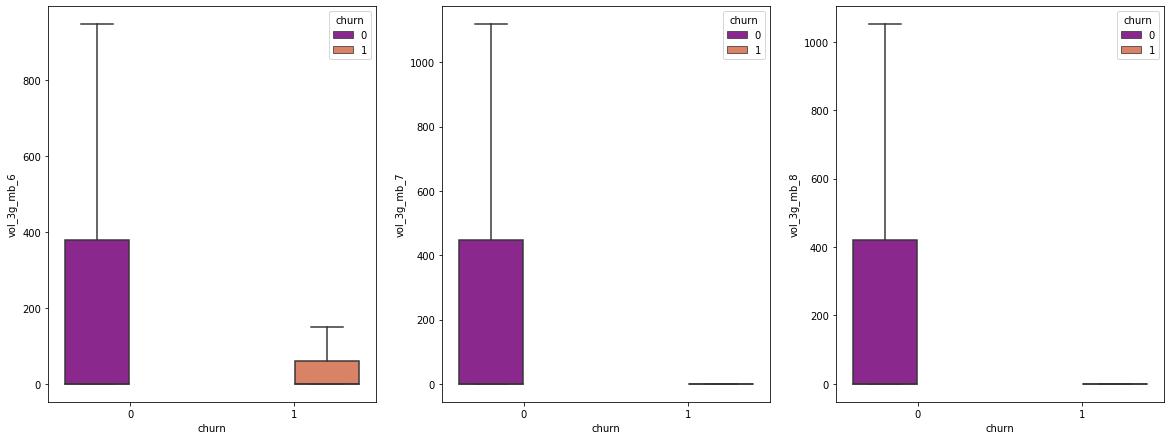

In [170]:
# Plot vol_3g_mb (volume of 3G) usage column
plot_box_chart('vol_3g_mb')

#### Observation :
 - Data usage(2g and 3g) starts dropping at 7th month and is least for 8th month for churn customers.
 - Customers using 3g data services are more than customers using 2g data services.
 - For non-churn customers, 2g/3g data usage is high than non churn customers suggesting that there is data issue for churn customers hence they decided to not use the service.

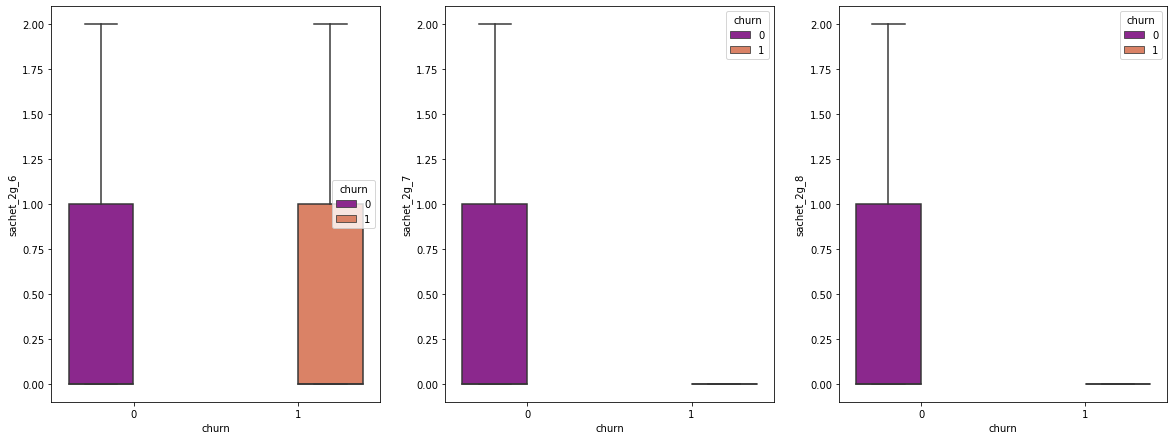

In [171]:
# Plot sachet_2g (Service schemes with validity smaller than a month) column
plot_box_chart('sachet_2g')

It shows that service schemes use is very less for 7 and 8th month for churn customer.

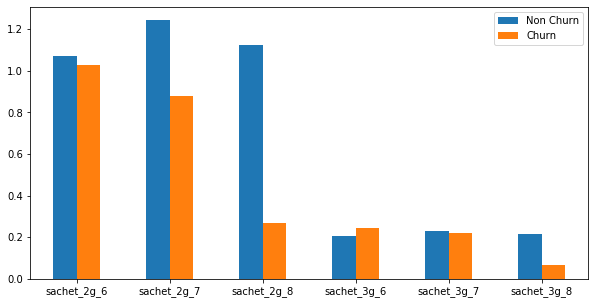

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.069303,1.243832,1.124383,0.206313,0.228048,0.214550
Churn,1.029496,0.877509,0.269971,0.244162,0.221221,0.065137


In [172]:
#Analysing above plot with mean values in bar chart
plot_mean_bar_chart(data, ['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8','sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'])

#### Observation:
We can observe that there is drop in Service schemes with validity smaller than a month for churned cutsomers in 8th month (action phase)

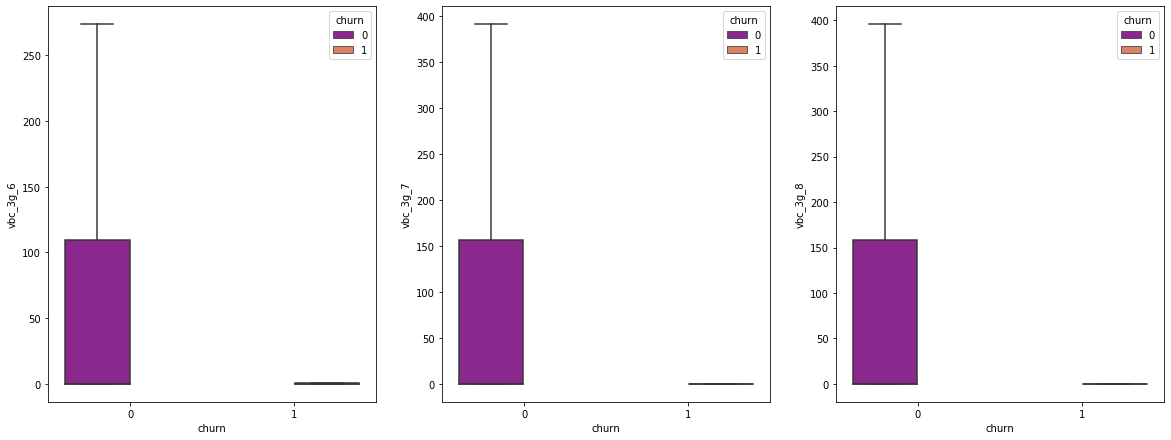

In [173]:
# Plot vbc_3g (Volume based cost - when no specific scheme is not purchased and paid as per usage) column
plot_box_chart('vbc_3g')

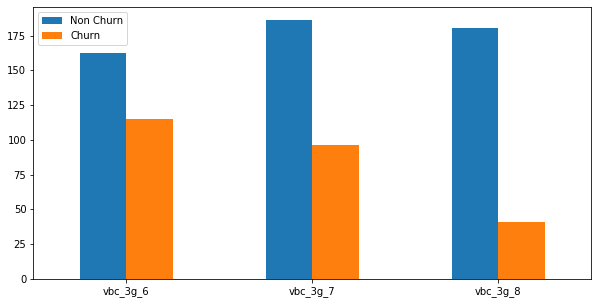

,vbc_3g_6,vbc_3g_7,vbc_3g_8
Non Churn,162.370343,186.206078,180.501280
Churn,115.096575,96.076317,40.851975


In [174]:
plot_mean_bar_chart(data, ['vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8'])

#### Observation:

We can observe that volume based cost for churn customers using 3G is very less for non churn customers. Also mean value decreased from 115 to 40 in 3 month for churn customers.

### 2.9.3 Features related to ARPU  (Average Revenue Per User)

In [175]:
# Identifying features related to arpu
data.columns[data.columns.str.contains('arpu',regex=True)]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

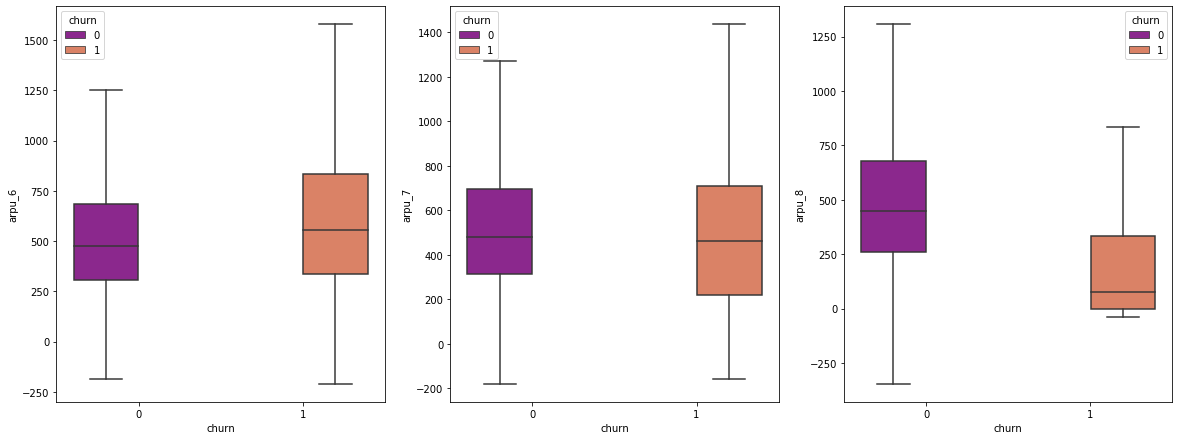

In [176]:
# Plot arpu feature
plot_box_chart('arpu')

We can observe overall decrease in arpu for Churners in 8th Month. We will now check for bar chart with mean values for a month.

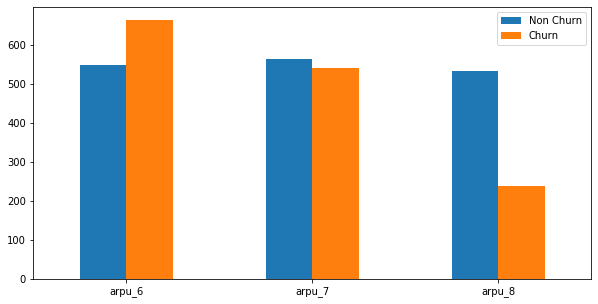

,arpu_6,arpu_7,arpu_8
Non Churn,549.220390,562.608191,532.635710
Churn,663.158246,540.165968,237.200793


In [177]:
#Plot bar chart for mean values of arpu
plot_mean_bar_chart(data, ['arpu_6', 'arpu_7', 'arpu_8'])

#### Observation:

We can observe that arpu value drops from 540 to 237 from Sep to Aug for churn customers.

### 2.9.4 Features related to ONNET

In [179]:
# Identifying features realated to ONNET
onnet_columns = data.columns[data.columns.str.contains('onnet',regex=True)]
onnet_columns

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

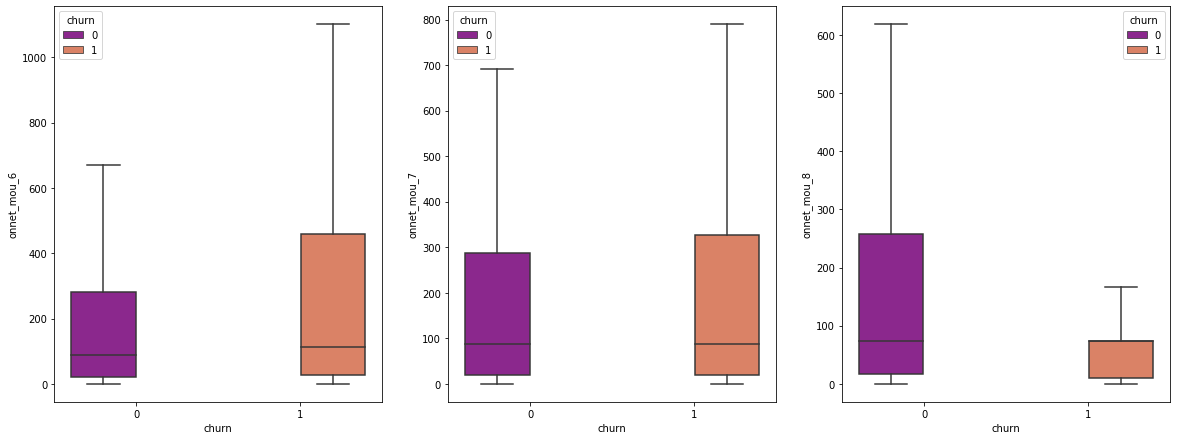

In [180]:
# Plot arpu feature
plot_box_chart('onnet_mou')

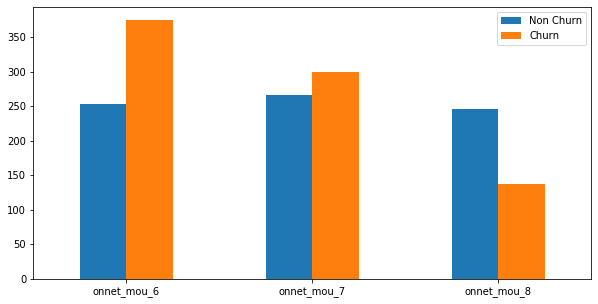

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,252.459655,266.659714,245.827645
Churn,374.541630,300.025473,136.919385


In [181]:
#Plot bar chart for mean values of onnet
plot_mean_bar_chart(data, ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'])

#### Observation:
We can observe that Onnet usage value drops from Good to Action Phase

## 2.10 Outlier Treatment

### 2.10.1 Check for  The Presence of Outliers

In [182]:
data.describe(percentiles= ([0.01,0.10,0.25,0.5,0.75,0.90,0.99]))

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001

#### Observation:
Most of the columns contain outliers.

### 2.10.2 Capping the outliers below 1st to above 99th Percentile

In [183]:
cont_cols = [col for col in data.columns if col not in (['date_of_last_rech_6','date_of_last_rech_7', 'date_of_last_rech_8',
                                                               'churn'])]

for col in cont_cols:
    percentiles = data[col].quantile([0.01,0.99]).values
    data[col][data[col] <= percentiles[0]] = percentiles[0]
    data[col][data[col] >= percentiles[1]] = percentiles[1]

## 2.11 Derived Features

### 2.11.1 Create Columns for 'Good' Phase (Combining 6 and 7 Month)

Create Columns with Average of 6th & 7th Month Since it's a "Good" Phase and Keep the 8th month untouched as it's "Action" Phase.

In [184]:
col_list = data.filter(regex='_6|_7').columns.str[:-2]

for idx, col in enumerate(col_list):
    avg_col_name = col+"_avg67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    data[avg_col_name] = (data[col_6] + data[col_7])/ 2

In [185]:
#Remove all the columns of month 6 & 7
data.drop(data.filter(regex='_6|_7').columns,axis=1,inplace=True)
print (data.shape)

(30001, 100)


Features related to Age on network - number of days the customer is using the operator T network

In [186]:
##Conevrt AON in Months
data['aon'] = data['aon']/30

### 2.11.2 Quantile based Binning of aon

In [187]:
# Binning aon to categories depending upon quantiles as (VL - Very Low, L - Low, M - Medium, H - High, VH - Very High)
labs = ['VL','L','M','H','VH']
quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]
data['aon_bin'] = pd.qcut(data.aon, quantiles, labs)

In [188]:
data.aon_bin.value_counts(normalize=True)

L     0.200360
VL    0.200093
H     0.199993
VH    0.199960
M     0.199593
Name: aon_bin, dtype: float64

In [189]:
data['aon_bin'].head()

0      M
7      M
8     VL
21     M
23     L
Name: aon_bin, dtype: category
Categories (5, object): [VL < L < M < H < VH]

In [190]:
#Remove aon column
data.drop('aon',1,inplace=True)
data.shape

(30001, 100)

In [191]:
data.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,churn,arpu_avg67,onnet_mou_avg67,offnet_mou_avg67,roam_ic_mou_avg67,roam_og_mou_avg67,loc_og_t2t_mou_avg67,loc_og_t2m_mou_avg67,loc_og_t2f_mou_avg67,loc_og_t2c_mou_avg67,loc_og_mou_avg67,std_og_t2t_mou_avg67,std_og_t2m_mou_avg67,std_og_t2f_mou_avg67,std_og_mou_avg67,isd_og_mou_avg67,spl_og_mou_avg67,og_others_avg67,total_og_mou_avg67,loc_ic_t2t_mou_avg67,loc_ic_t2m_mou_avg67,loc_ic_t2f_mou_avg67,loc_ic_mou_avg67,std_ic_t2t_mou_avg67,std_ic_t2m_mou_avg67,std_ic_t2f_mou_avg67,std_ic_mou_avg67,total_ic_mou_avg67,spl_ic_mou_avg67,isd_ic_mou_avg67,ic_others_avg67,total_rech_num_avg67,total_rech_amt_avg67,max_rech_amt_avg67,date_of_last_rech_avg67,last_day_rch_amt_avg67,total_rech_data_avg67,max_rech_data_avg67,count_rech_2g_avg67,count_rech_3g_avg67,av_rech_amt_data_avg67,vol_2g_mb_avg67,vol_3g_mb_avg67,arpu_3g_avg67,arpu_2g_avg67,monthly_2g_avg67,sachet_2g_avg67,monthly_3g_avg67,sachet_3g_avg67,vbc_3g_avg67,aon_bin
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,8.0,252,1.0,252.0,0.0,1.0,252.0,5.75,109.61,212.17,212.17,0,0,1,0,30.40,1,206.1005,87.4725,228.3775,0.00,0.000,25.680,80.9625,0.160,0.0,131.040,3.330,17.9675,0.00,50.415,0.000,0.56,0.0,0.000,26.345,87.565,2.085,140.210,0.515,5.440,0.00,12.360,0.000,0.000,0.000,0.000,3.5,307.0,252.0,18.5,252.0,1.0,252.0,0.0,1.0,252.0,15.725,117.165,212.170,212.17,0.0,0.0,1.0,0.0,50.600,M
7,1986.622,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,2341,951,26.0,565,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,57.74,1,1209.5150,56.2600,510.2950,24.86,18.165,41.385,378.0050,58.635,0.0,478.035,13.795,40.8250,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,42.81,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,895.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,19.060,M
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,30.0,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.00,0,3,0,0,21.03,0,435.4720,382.3600,87.6450,0.00,0.000,257.360,75.7700,0.000,0.0,333.135,124.995,11.8650,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.00,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,28.0,25.0,1.0,77.0,1.0,0.0,88.5,178.000,375.475,0.000,0.00,0.5,0.5,0.0,0.0,516.405,VL
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,31.0,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0,556.1030,117.2600,827.3050,0.00,0.000,5.320,89.8700,0.375,0.0,95.565,111.935,737.0500,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.00,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,30.5,25.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,M
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.

## 2.11 Create Dummy Variables

In [192]:
# Creating dummy variable for categorical variables and dropping the first one.
dummy = pd.get_dummies(data['aon_bin'], prefix='aon', drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy], axis=1)

In [193]:
data.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,churn,arpu_avg67,onnet_mou_avg67,offnet_mou_avg67,roam_ic_mou_avg67,roam_og_mou_avg67,loc_og_t2t_mou_avg67,loc_og_t2m_mou_avg67,loc_og_t2f_mou_avg67,loc_og_t2c_mou_avg67,loc_og_mou_avg67,std_og_t2t_mou_avg67,std_og_t2m_mou_avg67,std_og_t2f_mou_avg67,std_og_mou_avg67,isd_og_mou_avg67,spl_og_mou_avg67,og_others_avg67,total_og_mou_avg67,loc_ic_t2t_mou_avg67,loc_ic_t2m_mou_avg67,loc_ic_t2f_mou_avg67,loc_ic_mou_avg67,std_ic_t2t_mou_avg67,std_ic_t2m_mou_avg67,std_ic_t2f_mou_avg67,std_ic_mou_avg67,total_ic_mou_avg67,spl_ic_mou_avg67,isd_ic_mou_avg67,ic_others_avg67,total_rech_num_avg67,total_rech_amt_avg67,max_rech_amt_avg67,date_of_last_rech_avg67,last_day_rch_amt_avg67,total_rech_data_avg67,max_rech_data_avg67,count_rech_2g_avg67,count_rech_3g_avg67,av_rech_amt_data_avg67,vol_2g_mb_avg67,vol_3g_mb_avg67,arpu_3g_avg67,arpu_2g_avg67,monthly_2g_avg67,sachet_2g_avg67,monthly_3g_avg67,sachet_3g_avg67,vbc_3g_avg67,aon_bin,aon_L,aon_M,aon_H,aon_VH
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,8.0,252,1.0,252.0,0.0,1.0,252.0,5.75,109.61,212.17,212.17,0,0,1,0,30.40,1,206.1005,87.4725,228.3775,0.00,0.000,25.680,80.9625,0.160,0.0,131.040,3.330,17.9675,0.00,50.415,0.000,0.56,0.0,0.000,26.345,87.565,2.085,140.210,0.515,5.440,0.00,12.360,0.000,0.000,0.000,0.000,3.5,307.0,252.0,18.5,252.0,1.0,252.0,0.0,1.0,252.0,15.725,117.165,212.170,212.17,0.0,0.0,1.0,0.0,50.600,M,0,1,0,0
7,1986.622,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,2341,951,26.0,565,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,57.74,1,1209.5150,56.2600,510.2950,24.86,18.165,41.385,378.0050,58.635,0.0,478.035,13.795,40.8250,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,42.81,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,895.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,19.060,M,0,1,0,0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,30.0,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.00,0,3,0,0,21.03,0,435.4720,382.3600,87.6450,0.00,0.000,257.360,75.7700,0.000,0.0,333.135,124.995,11.8650,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.00,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,28.0,25.0,1.0,77.0,1.0,0.0,88.5,178.000,375.475,0.000,0.00,0.5,0.5,0.0,0.0,516.405,VL,0,0,0,0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,31.0,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0,556.1030,117.2600,827.3050,0.00,0.000,5.320,89.8700,0.375,0.0,95.565,111.935,737.0500,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.00,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,30.5,25.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,M,0,1,0,0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71

In [194]:
# Drop repeated variables
data = data.drop('aon_bin',1)
data.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,churn,arpu_avg67,onnet_mou_avg67,offnet_mou_avg67,roam_ic_mou_avg67,roam_og_mou_avg67,loc_og_t2t_mou_avg67,loc_og_t2m_mou_avg67,loc_og_t2f_mou_avg67,loc_og_t2c_mou_avg67,loc_og_mou_avg67,std_og_t2t_mou_avg67,std_og_t2m_mou_avg67,std_og_t2f_mou_avg67,std_og_mou_avg67,isd_og_mou_avg67,spl_og_mou_avg67,og_others_avg67,total_og_mou_avg67,loc_ic_t2t_mou_avg67,loc_ic_t2m_mou_avg67,loc_ic_t2f_mou_avg67,loc_ic_mou_avg67,std_ic_t2t_mou_avg67,std_ic_t2m_mou_avg67,std_ic_t2f_mou_avg67,std_ic_mou_avg67,total_ic_mou_avg67,spl_ic_mou_avg67,isd_ic_mou_avg67,ic_others_avg67,total_rech_num_avg67,total_rech_amt_avg67,max_rech_amt_avg67,date_of_last_rech_avg67,last_day_rch_amt_avg67,total_rech_data_avg67,max_rech_data_avg67,count_rech_2g_avg67,count_rech_3g_avg67,av_rech_amt_data_avg67,vol_2g_mb_avg67,vol_3g_mb_avg67,arpu_3g_avg67,arpu_2g_avg67,monthly_2g_avg67,sachet_2g_avg67,monthly_3g_avg67,sachet_3g_avg67,vbc_3g_avg67,aon_L,aon_M,aon_H,aon_VH
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,8.0,252,1.0,252.0,0.0,1.0,252.0,5.75,109.61,212.17,212.17,0,0,1,0,30.40,1,206.1005,87.4725,228.3775,0.00,0.000,25.680,80.9625,0.160,0.0,131.040,3.330,17.9675,0.00,50.415,0.000,0.56,0.0,0.000,26.345,87.565,2.085,140.210,0.515,5.440,0.00,12.360,0.000,0.000,0.000,0.000,3.5,307.0,252.0,18.5,252.0,1.0,252.0,0.0,1.0,252.0,15.725,117.165,212.170,212.17,0.0,0.0,1.0,0.0,50.600,0,1,0,0
7,1986.622,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,2341,951,26.0,565,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,57.74,1,1209.5150,56.2600,510.2950,24.86,18.165,41.385,378.0050,58.635,0.0,478.035,13.795,40.8250,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,42.81,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,895.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,19.060,0,1,0,0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,30.0,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.00,0,3,0,0,21.03,0,435.4720,382.3600,87.6450,0.00,0.000,257.360,75.7700,0.000,0.0,333.135,124.995,11.8650,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.00,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,28.0,25.0,1.0,77.0,1.0,0.0,88.5,178.000,375.475,0.000,0.00,0.5,0.5,0.0,0.0,516.405,0,0,0,0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,31.0,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0,556.1030,117.2600,827.3050,0.00,0.000,5.320,89.8700,0.375,0.0,95.565,111.935,737.0500,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.00,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,30.5,25.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0,1,0,0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64

## 2.12 Train-Test Split

In [195]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = data.drop('churn',axis=1)

# Putting response variable to y
y = data['churn']

In [196]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 2.13 Feature Scaling

In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = [col for col in X_train.columns if col not in(X_train.filter(regex= 'aon',axis=1).columns)]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,arpu_avg67,onnet_mou_avg67,offnet_mou_avg67,roam_ic_mou_avg67,roam_og_mou_avg67,loc_og_t2t_mou_avg67,loc_og_t2m_mou_avg67,loc_og_t2f_mou_avg67,loc_og_t2c_mou_avg67,loc_og_mou_avg67,std_og_t2t_mou_avg67,std_og_t2m_mou_avg67,std_og_t2f_mou_avg67,std_og_mou_avg67,isd_og_mou_avg67,spl_og_mou_avg67,og_others_avg67,total_og_mou_avg67,loc_ic_t2t_mou_avg67,loc_ic_t2m_mou_avg67,loc_ic_t2f_mou_avg67,loc_ic_mou_avg67,std_ic_t2t_mou_avg67,std_ic_t2m_mou_avg67,std_ic_t2f_mou_avg67,std_ic_mou_avg67,total_ic_mou_avg67,spl_ic_mou_avg67,isd_ic_mou_avg67,ic_others_avg67,total_rech_num_avg67,total_rech_amt_avg67,max_rech_amt_avg67,date_of_last_rech_avg67,last_day_rch_amt_avg67,total_rech_data_avg67,max_rech_data_avg67,count_rech_2g_avg67,count_rech_3g_avg67,av_rech_amt_data_avg67,vol_2g_mb_avg67,vol_3g_mb_avg67,arpu_3g_avg67,arpu_2g_avg67,monthly_2g_avg67,sachet_2g_avg67,monthly_3g_avg67,sachet_3g_avg67,vbc_3g_avg67,aon_L,aon_M,aon_H,aon_VH
39186,0.244555,-0.570691,-0.578002,0.555328,-0.102499,-0.481031,-0.640696,-0.405331,-0.080072,-0.675228,-0.415826,-0.413933,-0.235265,-0.530832,8.748740,-0.399030,0.0,-0.706473,-0.113939,-0.221625,-0.372296,-0.260750,-0.360622,0.627164,-0.280483,0.221328,-0.020668,-0.263592,1.550000,-0.255281,-0.804813,0.186418,0.489212,0.437273,1.028552,-0.612663,-0.709813,-0.508805,-0.423953,-0.688412,-0.401038,-0.471418,-0.416902,-0.433531,-0.384507,-0.442192,-0.372654,-0.256767,-0.451047,1.392615,-0.648131,-0.531479,0.418146,-0.154368,-0.492134,-0.665976,-0.390913,0.501426,-0.700481,-0.481247,-0.497222,-0.262355,-0.638853,9.178902,-0.154817,-0.378179,-0.761203,-0.367445,-0.062812,-0.189595,-0.226660,-0.417522,-0.016234,-0.310301,-0.218100,0.350896,-0.449893,5.907459,0.093738,-0.653101,1.410064,1.912061,-1.186272,1.293234,-0.710867,-0.838889,-0.582339,-0.508167,-0.849867,-0.481230,-0.524052,-0.479504,-0.507976,-0.467711,-0.498160,-0.429593,-0.317459,-0.476852,0,0,0,1
39833,-0.352147,-0.478790,-0.165702,-0.250809,-0.265965,-0.218099,0.304872,2.257365,-0.335754,0.175395,-0.415826,-0.395492,-0.235265,-0.519580,-0.149787,-0.492181,0.0,-0.370138,-0.213385,0.543413,0.025945,0.264091,-0.360622,-0.031302,-0.280483,-0.207824,0.149476,-0.263592,-0.066242,-0.191643,-0.569673,-0.182483,-0.189330,0.817510,0.384141,-0.221102,0.271471,-0.076760,-0.423953,-0.121925,0.988244,-0.226170,-0.416902,-0.433453,-0.384507,-0.010002,-0.372654,-0.256767,0.065462,-0.430594,-0.413615,-0.240800,-0.305255,-0.319997,-0.207202,0.341258,0.227304,1.966024,0.109557,-0.332583,-0.441797,0.430298,-0.503111,-0.170988,0.234449,-0.378179,-0.395741,-0.376138,0.148567,2.019982,0.167990,0.099729,0.056510,2.725242,0.255565,0.277892,-0.449893,0.802075,1.363294,-0.526754,-0.433323,-0.393993,-0.234213,0.074765,0.323128,0.229076,0.546392,-0.508167,0.264657,-0.168116,-0.138213,-0.377007,-0.503331,-0.467711,0.623436,-0.429593,-0.317459,0.158084,0,0,0,1
38778,-0.484595,-0.369723,-0.293987,1.521865,1.005459,-0.321967,-0.110488,-0.405331,-0.335754,-0.255968,-0.335209,-0.335582,-0.235265,-0.432342,-0.149787,-0.492181,0.0,-0.506193,-0.107625,0.016196,-0.284028,-0.088073,0.706864,0.246791,-0.280483,0.367906,0.069643,-0.263592,0.184593,4.298335,0.018179,-0.460244,-0.189330,-0.703439,-0.536445,-0.612663,-0.709813,-0.508805,-0.423953,-0.688412,-0.401038,-0.471418,-0.416902,-0.4335

## 2.14 Handling Imbalanced Dataset

In [198]:
data['churn'].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

In [199]:
y_train.value_counts(normalize=True)

0    0.919476
1    0.080524
Name: churn, dtype: float64

The target variable 'churn' shows the presence of class imbalance both in the main dataset and the training set. So let's handle class imbalance using ADASYN.

In [200]:
# ADASYN
from collections import Counter
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=100, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

38427

In [201]:
print(sorted(Counter(y_resampled_ada).items()))

[(0, 19309), (1, 19118)]


Now the training set becomes blanced with almost similar percentage of data in both the minority and majority class.

# 3. Model Building

## 3.1 Logistic Regression

In [202]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### 3.1.1 RFE

In [203]:
# Running RFE with 15 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_resampled_ada,y_resampled_ada)

In [204]:
list(zip(X_resampled_ada.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 8),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', False, 81),
 ('roam_ic_mou_8', False, 59),
 ('roam_og_mou_8', False, 38),
 ('loc_og_t2t_mou_8', False, 84),
 ('loc_og_t2m_mou_8', False, 37),
 ('loc_og_t2f_mou_8', False, 52),
 ('loc_og_t2c_mou_8', False, 71),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_8', False, 39),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_8', False, 60),
 ('spl_og_mou_8', False, 85),
 ('og_others_8', False, 88),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 15),
 ('loc_ic_t2m_mou_8', False, 14),
 ('loc_ic_t2f_mou_8', False, 40),
 ('loc_ic_mou_8', False, 13),
 ('std_ic_t2t_mou_8', False, 22),
 ('std_ic_t2m_mou_8', False, 23),
 ('std_ic_t2f_mou_8', False, 26),
 ('std_ic_mou_8', False, 16),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 17),
 ('ic_others_8', False, 87),
 ('total_rech_num_8', False, 27),
 ('total_rech_amt_8', False, 83),


In [205]:
col = X_resampled_ada.columns[rfe.support_]
col

Index(['onnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_data_8', 'max_rech_data_8', 'offnet_mou_avg67', 'aon_L',
       'aon_M', 'aon_H', 'aon_VH'],
      dtype='object')

### 3.1.2 Use statsmodels

In [206]:
# Building 1st Model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_resampled_ada[col])
logm1 = sm.GLM(y_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38427
Model:                            GLM   Df Residuals:                    38411
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13002.
Date:                Sun, 29 Nov 2020   Deviance:                       26005.
Time:                        16:33:51   Pearson chi2:                 4.27e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1080      0.027      4.014      0.000       0.055       0.161
onnet_mou_8           1.1947      0.082     14.565      0.000       1.034       1.355
loc_og_mou_8          3.0708      0.119     25.883      0.000       2.838       3.303
std_og_t2t_mou_8     -2.0586      0.115    -17.881      0.000      -2.284      -1.833
std_og_t2m_mou_8     -1.4790      0.095    -15.589      0.000      -1.665      -1.293
std_og_mou_8          9.0123      0.255     35.407      0.000       8.513       9.511
total_og_mou_8       -8.9780      0.235    -38.208      0.000      -9.439      -8.517
total_ic_mou_8       -0.6140      0.033    -18.698      0.000      -0.678      -0.550
spl_ic_mou_8         -0.6244      0.030    -20.869      0.000      -0.683      -0.566
total_rech_data_8    -0.6794      0.024    -28.075      0.000      -0.727      -0.632
max_rech_data_8      -0.6412      0.020    -31.938      0.000      -0.681      -0.602
offnet_mou_avg67      0.5840      0.024     24.730      0.000       0.538       0.630
aon_L                -2.3362      0.045    -52.408      0.000      -2.424      -2.249
aon_M                -2.3512      0.045    -51.731      0.000      -2.440      -2.262
aon_H                -2.8835      0.053    -54.149      0.000      -2.988      -2.779
aon_VH               -3.1260      0.063    -49.321      0.000      -3.250      -3.002
=====================================================================================
"""

p-value of all variables are less. So we can check Variance Inflation Factor to see if there is any correlation between the variables.

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [208]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_ada[col].values, i) for i in range(X_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,std_og_mou_8,105.52
5,total_og_mou_8,54.93
2,std_og_t2t_mou_8,37.68
3,std_og_t2m_mou_8,27.56
1,loc_og_mou_8,12.85
0,onnet_mou_8,10.63
10,offnet_mou_avg67,1.74
6,total_ic_mou_8,1.73
8,total_rech_data_8,1.18
9,max_rech_data_8,1.18


The variable 'std_og_mou_8' has very high vif. So let's drop it.

In [209]:
# Dropping the column with high vif
col = col.drop('std_og_mou_8',1)

In [210]:
# Building 2nd Model
X_train_sm = sm.add_constant(X_resampled_ada[col])
logm2 = sm.GLM(y_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38427
Model:                            GLM   Df Residuals:                    38412
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13731.
Date:                Sun, 29 Nov 2020   Deviance:                       27462.
Time:                        16:34:12   Pearson chi2:                 5.55e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2080      0.027      7.760      0.000       0.155       0.261
onnet_mou_8           1.3028      0.076     17.166      0.000       1.154       1.452
loc_og_mou_8          0.3691      0.082      4.479      0.000       0.208       0.531
std_og_t2t_mou_8      0.5011      0.103      4.856      0.000       0.299       0.703
std_og_t2m_mou_8      1.1061      0.084     13.222      0.000       0.942       1.270
total_og_mou_8       -3.2350      0.152    -21.317      0.000      -3.532      -2.938
total_ic_mou_8       -0.8675      0.034    -25.149      0.000      -0.935      -0.800
spl_ic_mou_8         -0.6777      0.030    -22.301      0.000      -0.737      -0.618
total_rech_data_8    -0.7497      0.024    -30.607      0.000      -0.798      -0.702
max_rech_data_8      -0.5392      0.019    -28.800      0.000      -0.576      -0.503
offnet_mou_avg67      0.5646      0.023     24.181      0.000       0.519       0.610
aon_L                -2.3022      0.043    -53.695      0.000      -2.386      -2.218
aon_M                -2.3474      0.044    -53.471      0.000      -2.433      -2.261
aon_H                -2.9096      0.051    -56.523      0.000      -3.011      -2.809
aon_VH               -3.1329      0.061    -51.569      0.000      -3.252      -3.014
=====================================================================================
"""

p-value of all variables are less. So we can check Variance Inflation Factor to see if there is any correlation between the variables.

In [211]:
vif = pd.DataFrame()
vif['Features'] = X_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_ada[col].values, i) for i in range(X_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,34.88
2,std_og_t2t_mou_8,16.61
3,std_og_t2m_mou_8,11.11
0,onnet_mou_8,10.52
1,loc_og_mou_8,8.99
9,offnet_mou_avg67,1.73
5,total_ic_mou_8,1.71
8,max_rech_data_8,1.18
7,total_rech_data_8,1.17
6,spl_ic_mou_8,1.04


The variable 'total_og_mou_8' has very high vif. So let's drop it.

In [212]:
# Dropping the column with high vif
col = col.drop('total_og_mou_8',1)

In [213]:
# Building 3rd Model
X_train_sm = sm.add_constant(X_resampled_ada[col])
logm3 = sm.GLM(y_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38427
Model:                            GLM   Df Residuals:                    38413
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14055.
Date:                Sun, 29 Nov 2020   Deviance:                       28110.
Time:                        16:34:21   Pearson chi2:                 4.70e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2608      0.027      9.802      0.000       0.209       0.313
onnet_mou_8           0.9047      0.064     14.164      0.000       0.779       1.030
loc_og_mou_8         -1.0225      0.044    -23.397      0.000      -1.108      -0.937
std_og_t2t_mou_8     -1.0045      0.059    -17.015      0.000      -1.120      -0.889
std_og_t2m_mou_8     -0.6183      0.023    -26.377      0.000      -0.664      -0.572
total_ic_mou_8       -1.0407      0.035    -30.090      0.000      -1.108      -0.973
spl_ic_mou_8         -0.6872      0.031    -22.519      0.000      -0.747      -0.627
total_rech_data_8    -0.8145      0.025    -33.127      0.000      -0.863      -0.766
max_rech_data_8      -0.5226      0.018    -28.351      0.000      -0.559      -0.487
offnet_mou_avg67      0.5149      0.023     22.745      0.000       0.471       0.559
aon_L                -2.2694      0.042    -53.815      0.000      -2.352      -2.187
aon_M                -2.3364      0.043    -53.959      0.000      -2.421      -2.252
aon_H                -2.9235      0.051    -57.559      0.000      -3.023      -2.824
aon_VH               -3.1801      0.060    -52.932      0.000      -3.298      -3.062
=====================================================================================
"""

p-value of all variables are less. So we can check Variance Inflation Factor to see if there is any correlation between the variables.

In [214]:
vif = pd.DataFrame()
vif['Features'] = X_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_ada[col].values, i) for i in range(X_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,onnet_mou_8,9.96
2,std_og_t2t_mou_8,9.18
1,loc_og_mou_8,2.80
8,offnet_mou_avg67,1.72
4,total_ic_mou_8,1.68
3,std_og_t2m_mou_8,1.64
7,max_rech_data_8,1.18
6,total_rech_data_8,1.16
5,spl_ic_mou_8,1.04
12,aon_VH,1.04


The variable 'onnet_mou_8' has very high vif. So let's drop it.

In [215]:
# Dropping the column with high vif
col = col.drop('onnet_mou_8',1)

In [216]:
# Building 4th Model
X_train_sm = sm.add_constant(X_resampled_ada[col])
logm4 = sm.GLM(y_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38427
Model:                            GLM   Df Residuals:                    38414
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14150.
Date:                Sun, 29 Nov 2020   Deviance:                       28299.
Time:                        16:34:30   Pearson chi2:                 4.78e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2772      0.027     10.417      0.000       0.225       0.329
loc_og_mou_8         -0.6526      0.032    -20.494      0.000      -0.715      -0.590
std_og_t2t_mou_8     -0.1986      0.015    -12.971      0.000      -0.229      -0.169
std_og_t2m_mou_8     -0.6013      0.023    -25.995      0.000      -0.647      -0.556
total_ic_mou_8       -1.1357      0.034    -33.009      0.000      -1.203      -1.068
spl_ic_mou_8         -0.6930      0.031    -22.703      0.000      -0.753      -0.633
total_rech_data_8    -0.8199      0.025    -33.370      0.000      -0.868      -0.772
max_rech_data_8      -0.5268      0.018    -28.646      0.000      -0.563      -0.491
offnet_mou_avg67      0.4815      0.022     21.774      0.000       0.438       0.525
aon_L                -2.2779      0.042    -54.159      0.000      -2.360      -2.195
aon_M                -2.3292      0.043    -54.079      0.000      -2.414      -2.245
aon_H                -2.9234      0.050    -58.034      0.000      -3.022      -2.825
aon_VH               -3.2038      0.060    -53.597      0.000      -3.321      -3.087
=====================================================================================
"""

In [217]:
vif = pd.DataFrame()
vif['Features'] = X_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_ada[col].values, i) for i in range(X_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,offnet_mou_avg67,1.69
2,std_og_t2m_mou_8,1.64
0,loc_og_mou_8,1.63
3,total_ic_mou_8,1.63
6,max_rech_data_8,1.18
5,total_rech_data_8,1.16
1,std_og_t2t_mou_8,1.07
4,spl_ic_mou_8,1.04
11,aon_VH,1.04
8,aon_L,1.03


All VIFs are low and p-values are below 0.05. So we can go ahead with model prediction.

### 3.1.3 Model Prediction

In [218]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [219]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)

In [220]:
# Data frame with given Converted and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Churn':y_resampled_ada.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustomerID'] = y_resampled_ada.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustomerID
0,0,0.209480,0
1,0,0.058114,1
2,0,0.170990,2
3,0,0.000501,3
4,0,0.474289,4


In [221]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustomerID,Predicted
0,0,0.209480,0,0
1,0,0.058114,1,0
2,0,0.170990,2,0
3,0,0.000501,3,0
4,0,0.474289,4,0


In [87]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print ('Accuracy: ', accuracy_score(y_resampled_ada, y_train_pred_final.Predicted))
print ('F1 score: ', f1_score(y_resampled_ada, y_train_pred_final.Predicted))
print ('Recall: ', recall_score(y_resampled_ada, y_train_pred_final.Predicted))
print ('Precision: ', precision_score(y_resampled_ada, y_train_pred_final.Predicted))
print ('\n clasification report:\n', classification_report(y_resampled_ada, y_train_pred_final.Predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_resampled_ada, y_train_pred_final.Predicted))

Accuracy:  0.8425586176386395
F1 score:  0.8429468874928612
Recall:  0.8492520138089759
Precision:  0.8367346938775511

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84     19309
           1       0.84      0.85      0.84     19118

    accuracy                           0.84     38427
   macro avg       0.84      0.84      0.84     38427
weighted avg       0.84      0.84      0.84     38427


 confussion matrix:
 [[16141  3168]
 [ 2882 16236]]


Sensitivity:  84.92%

### 3.1.4 Plot ROC Curve¶

In [222]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [223]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False)

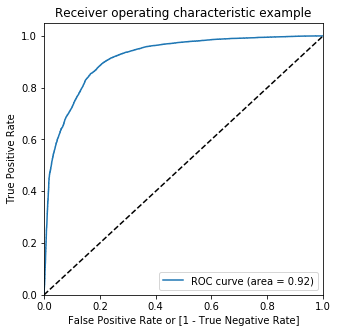

In [224]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

The area under the ROC curve is 0.92, which is a very good value.

### 3.1.5 Find Optimal Cutoff Point

In [225]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustomerID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.209480,0,0,1,1,1,0,0,0,0,0,0,0
1,0,0.058114,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.170990,2,0,1,1,0,0,0,0,0,0,0,0
3,0,0.000501,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.474289,4,0,1,1,1,1,1,0,0,0,0,0


In [226]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.497515  1.000000  0.000000
0.1   0.1  0.716553  0.980333  0.455383
0.2   0.2  0.788508  0.961450  0.617277
0.3   0.3  0.825123  0.931949  0.719354
0.4   0.4  0.841934  0.894863  0.789528
0.5   0.5  0.842559  0.849252  0.835931
0.6   0.6  0.826580  0.777487  0.875188
0.7   0.7  0.807583  0.702427  0.911699
0.8   0.8  0.784474  0.623130  0.944223
0.9   0.9  0.734015  0.489748  0.975866


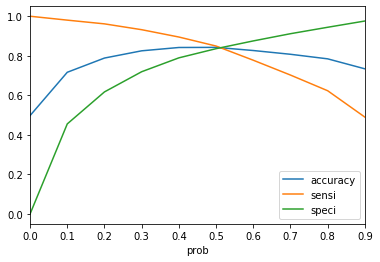

In [227]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.5 is the optimum point to take it as a cutoff probability, which has already been taken earlier.

### 3.1.6 Making Predictions on Test Set

In [228]:
X_test1 = X_test.copy()

In [229]:
X_test1[num_cols] = scaler.transform(X_test1[num_cols])

In [230]:
X_test1 = X_test1[col]
X_test1.head()

,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_data_8,max_rech_data_8,offnet_mou_avg67,aon_L,aon_M,aon_H,aon_VH
20296,-0.678375,-0.415826,-0.436931,-0.701309,-0.263592,-0.612663,-0.709813,-0.826959,0,1,0,0
8279,-0.745570,-0.409147,-0.454485,-0.783848,-0.263592,0.562021,-0.459485,-0.852805,0,1,0,0
72269,1.874175,-0.196891,0.158039,0.587283,-0.263592,-0.612663,-0.709813,1.078599,0,0,0,0
65602,0.135973,-0.412917,-0.262951,-0.266366,-0.263592,-0.612663,-0.709813,-0.152339,0,0,1,0
42758,-0.746933,-0.385313,-0.454485,-0.758768,-0.263592,-0.612663,-0.709813,-0.572489,0,0,1,0


In [231]:
X_test_sm = sm.add_constant(X_test1)

In [232]:
# Making Predictions on Test Set
y_test_pred = res.predict(X_test_sm)

In [233]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [234]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [235]:
# Putting CustID to index
y_test_df['CustomerID'] = y_test_df.index

In [236]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [237]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [238]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [239]:
# Making prediction using cut off 0.5
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,churn,CustomerID,Churn_Prob,final_predicted
0,1,20296,0.548142,1
1,1,8279,0.317030,0
2,0,72269,0.477385,1
3,0,65602,0.230267,0
4,1,42758,0.459079,1


In [240]:
print ('Accuracy: ', accuracy_score(y_pred_final.churn, y_pred_final.final_predicted))
print ('F1 score: ', f1_score(y_pred_final.churn, y_pred_final.final_predicted))
print ('Recall: ', recall_score(y_pred_final.churn, y_pred_final.final_predicted))
print ('Precision: ', precision_score(y_pred_final.churn, y_pred_final.final_predicted))
print ('\n clasification report:\n', classification_report(y_pred_final.churn, y_pred_final.final_predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted))

Accuracy:  0.7971336518164648
F1 score:  0.38683680322364006
Recall:  0.768
Precision:  0.2585278276481149

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      8251
           1       0.26      0.77      0.39       750

    accuracy                           0.80      9001
   macro avg       0.62      0.78      0.63      9001
weighted avg       0.91      0.80      0.84      9001


 confussion matrix:
 [[6599 1652]
 [ 174  576]]


#### Observation:
- Accuracy is almost same for both the train and test set predictions.
- The False Negative value is quite low for both train and test set predictions.
- The Recall value for train set is 0.84 and for test set is 0.66
- The features that mattered most in the churn prediction are -
       'loc_og_mou_8' 
       'std_og_t2t_mou_8'
       'std_og_t2m_mou_8',
       'total_ic_mou_8', 
       'spl_ic_mou_8', 
       'total_rech_data_8',
       'max_rech_data_8', 
       'offnet_mou_avg67', 
       'aon_L', 
       'aon_M', 
       'aon_H',
       'aon_VH'

Using the above important features from the above coarse tuning and fine tuning methods in Logistic Regression, let's create Decision Tree and Random Forest Models.

## 3.2 Decision Tree

In [241]:
# Decision Tree Using Default Hyperparameters
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_resampled_ada[col],y_resampled_ada)

DecisionTreeClassifier(random_state=100)

In [242]:
# Evaluation on Train Set
print ('Accuracy: ', accuracy_score(y_resampled_ada, dt.predict(X_resampled_ada[col])))
print ('F1 score: ', f1_score(y_resampled_ada, dt.predict(X_resampled_ada[col])))
print ('Recall: ', recall_score(y_resampled_ada, dt.predict(X_resampled_ada[col])))
print ('Precision: ', precision_score(y_resampled_ada, dt.predict(X_resampled_ada[col])))
print ('\n clasification report:\n', classification_report(y_resampled_ada, dt.predict(X_resampled_ada[col])))
print ('\n confussion matrix:\n',confusion_matrix(y_resampled_ada, dt.predict(X_resampled_ada[col])))

Accuracy:  0.9979962005881281
F1 score:  0.997987506860772
Recall:  0.9986400251072288
Precision:  0.9973358407773076

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19309
           1       1.00      1.00      1.00     19118

    accuracy                           1.00     38427
   macro avg       1.00      1.00      1.00     38427
weighted avg       1.00      1.00      1.00     38427


 confussion matrix:
 [[19258    51]
 [   26 19092]]


In [243]:
# Evaluation on Test Set
print ('Accuracy: ', accuracy_score(y_test, dt.predict(X_test1)))
print ('F1 score: ', f1_score(y_test, dt.predict(X_test1)))
print ('Recall: ', recall_score(y_test, dt.predict(X_test1)))
print ('Precision: ', precision_score(y_test, dt.predict(X_test1)))
print ('\n clasification report:\n', classification_report(y_test, dt.predict(X_test1)))
print ('\n confussion matrix:\n',confusion_matrix(y_test, dt.predict(X_test1)))

Accuracy:  0.866237084768359
F1 score:  0.4228187919463087
Recall:  0.588
Precision:  0.3300898203592814

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      8251
           1       0.33      0.59      0.42       750

    accuracy                           0.87      9001
   macro avg       0.64      0.74      0.67      9001
weighted avg       0.91      0.87      0.88      9001


 confussion matrix:
 [[7356  895]
 [ 309  441]]


### 3.2.1 Hyper-parameter Tuning Using Cross Validation

In [244]:
from sklearn.model_selection import GridSearchCV

In [245]:
# Create the parameter grid 
hyper_params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

In [246]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=hyper_params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "recall")

In [247]:
%%time
grid_search.fit(X_resampled_ada[col], y_resampled_ada)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   35.2s finished


Wall time: 36 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [248]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=75,
                       min_samples_split=50, random_state=100)

In [249]:
# Evaluation on Train Set
print ('Accuracy: ', accuracy_score(y_resampled_ada, dt_best.predict(X_resampled_ada[col])))
print ('F1 score: ', f1_score(y_resampled_ada, dt_best.predict(X_resampled_ada[col])))
print ('Recall: ', recall_score(y_resampled_ada, dt_best.predict(X_resampled_ada[col])))
print ('Precision: ', precision_score(y_resampled_ada, dt_best.predict(X_resampled_ada[col])))
print ('\n clasification report:\n', classification_report(y_resampled_ada, dt_best.predict(X_resampled_ada[col])))
print ('\n confussion matrix:\n',confusion_matrix(y_resampled_ada, dt_best.predict(X_resampled_ada[col])))

Accuracy:  0.8711583001535379
F1 score:  0.8706601530865486
Recall:  0.8716392928130557
Precision:  0.8696832106883774

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     19309
           1       0.87      0.87      0.87     19118

    accuracy                           0.87     38427
   macro avg       0.87      0.87      0.87     38427
weighted avg       0.87      0.87      0.87     38427


 confussion matrix:
 [[16812  2497]
 [ 2454 16664]]


In [250]:
# Evaluation on Test Set
print ('Accuracy: ', accuracy_score(y_test, dt_best.predict(X_test1)))
print ('F1 score: ', f1_score(y_test, dt_best.predict(X_test1)))
print ('Recall: ', recall_score(y_test, dt_best.predict(X_test1)))
print ('Precision: ', precision_score(y_test, dt_best.predict(X_test1)))
print ('\n clasification report:\n', classification_report(y_test, dt_best.predict(X_test1)))
print ('\n confussion matrix:\n',confusion_matrix(y_test, dt_best.predict(X_test1)))

Accuracy:  0.8530163315187201
F1 score:  0.4396442185514612
Recall:  0.692
Precision:  0.3221601489757914

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      8251
           1       0.32      0.69      0.44       750

    accuracy                           0.85      9001
   macro avg       0.65      0.78      0.68      9001
weighted avg       0.91      0.85      0.88      9001


 confussion matrix:
 [[7159 1092]
 [ 231  519]]


#### Observation:
- The training and test accuracy is nearly same after hyper-parameter tuning.
- The number of False Negative is quite low and we have a good recall and sensitivity value of 69%.

## 3.3 Random Forest

In [251]:
# Random Forest Using Default Hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)
rf.fit(X_resampled_ada[col],y_resampled_ada)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

In [252]:
# Evaluation on Train Set
print ('Accuracy: ', accuracy_score(y_resampled_ada, rf.predict(X_resampled_ada[col])))
print ('F1 score: ', f1_score(y_resampled_ada, rf.predict(X_resampled_ada[col])))
print ('Recall: ', recall_score(y_resampled_ada, rf.predict(X_resampled_ada[col])))
print ('Precision: ', precision_score(y_resampled_ada, rf.predict(X_resampled_ada[col])))
print ('\n clasification report:\n', classification_report(y_resampled_ada, rf.predict(X_resampled_ada[col])))
print ('\n confussion matrix:\n',confusion_matrix(y_resampled_ada, rf.predict(X_resampled_ada[col])))

Accuracy:  0.9979441538501574
F1 score:  0.9979353422366255
Recall:  0.9986400251072288
Precision:  0.9972316531731522

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19309
           1       1.00      1.00      1.00     19118

    accuracy                           1.00     38427
   macro avg       1.00      1.00      1.00     38427
weighted avg       1.00      1.00      1.00     38427


 confussion matrix:
 [[19256    53]
 [   26 19092]]


In [253]:
# Evaluation on Test Set
print ('Accuracy: ', accuracy_score(y_test, rf.predict(X_test1)))
print ('F1 score: ', f1_score(y_test, rf.predict(X_test1)))
print ('Recall: ', recall_score(y_test, rf.predict(X_test1)))
print ('Precision: ', precision_score(y_test, rf.predict(X_test1)))
print ('\n clasification report:\n', classification_report(y_test, rf.predict(X_test1)))
print ('\n confussion matrix:\n',confusion_matrix(y_test, rf.predict(X_test1)))

Accuracy:  0.9040106654816131
F1 score:  0.49650349650349657
Recall:  0.568
Precision:  0.4409937888198758

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      8251
           1       0.44      0.57      0.50       750

    accuracy                           0.90      9001
   macro avg       0.70      0.75      0.72      9001
weighted avg       0.92      0.90      0.91      9001


 confussion matrix:
 [[7711  540]
 [ 324  426]]


In the default hyperparameter the FN is little high. So let's do hyperparameter tuning.

### 3.3.1 Hyperparameter Tuning Using RandomizedSearchCV

In [254]:
# Create the parameter grid
hyper_params = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}

In [255]:
from sklearn.model_selection import RandomizedSearchCV

In [258]:
from sklearn.model_selection import GridSearchCV

In [256]:
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf, param_distributions=hyper_params, return_train_score=True,
                          cv = 3, n_jobs = -1,verbose = 1, n_iter=50)

In [257]:
%%time
grid_search.fit(X_resampled_ada[col], y_resampled_ada)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 18.8min finished


Wall time: 21min 14s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=50,
                                                    oob_score=True,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [10, 20, 25],
                                        'min_samples_leaf': range(100, 300, 100),
                                        'min_samples_split': range(200, 500, 100),
                                        'n_estimators': [500, 700]},
                   return_train_score=True, verbose=1)

In [259]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=700, oob_score=True,
                       random_state=42)

In [260]:
# Evaluation on Train Set
print ('Accuracy: ', accuracy_score(y_resampled_ada, rf_best.predict(X_resampled_ada[col])))
print ('F1 score: ', f1_score(y_resampled_ada, rf_best.predict(X_resampled_ada[col])))
print ('Recall: ', recall_score(y_resampled_ada, rf_best.predict(X_resampled_ada[col])))
print ('Precision: ', precision_score(y_resampled_ada, rf_best.predict(X_resampled_ada[col])))
print ('\n clasification report:\n', classification_report(y_resampled_ada, rf_best.predict(X_resampled_ada[col])))
print ('\n confussion matrix:\n',confusion_matrix(y_resampled_ada, rf_best.predict(X_resampled_ada[col])))

Accuracy:  0.8761547869987248
F1 score:  0.8751148083029364
Recall:  0.8721623600795062
Precision:  0.8780873137079361

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     19309
           1       0.88      0.87      0.88     19118

    accuracy                           0.88     38427
   macro avg       0.88      0.88      0.88     38427
weighted avg       0.88      0.88      0.88     38427


 confussion matrix:
 [[16994  2315]
 [ 2444 16674]]


In [261]:
# Evaluation on Test Set
print ('Accuracy: ', accuracy_score(y_test, rf_best.predict(X_test1)))
print ('F1 score: ', f1_score(y_test, rf_best.predict(X_test1)))
print ('Recall: ', recall_score(y_test, rf_best.predict(X_test1)))
print ('Precision: ', precision_score(y_test, rf_best.predict(X_test1)))
print ('\n clasification report:\n', classification_report(y_test, rf_best.predict(X_test1)))
print ('\n confussion matrix:\n',confusion_matrix(y_test, rf_best.predict(X_test1)))

Accuracy:  0.8682368625708254
F1 score:  0.4719501335707924
Recall:  0.7066666666666667
Precision:  0.35427807486631013

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      8251
           1       0.35      0.71      0.47       750

    accuracy                           0.87      9001
   macro avg       0.66      0.79      0.70      9001
weighted avg       0.92      0.87      0.89      9001


 confussion matrix:
 [[7285  966]
 [ 220  530]]


#### Observation:
- The training and test accuracy is nearly same after hyper-parameter tuning.
- The number of False Negative is quite low and we have a good recall value of 70.6%.

# Recommendation:
- Dip in Total data recharge and Outgoing MOU in the 'action' phase is a clear sign of churn.
- If the recharge amount shows a dip in the action phase is sign of churn.
- Age on network is also a key indicator for identifying the churn. If Age on network of customer is very high, then they are not going to churn and if the age on network of the customer is very low, then the customer will contribute to churn.
- People with less than 4 Yrs of Tenure are more likely to Churn
- Behaviour of 8 Month can be the base of Churn Analysis.
- Local Incoming and Outgoing Calls for 8th Month are important factor for churn analysis.
- <b> Random Forest Model </b> is the best to predict the churn accurately with an accuracy of 86% and recall value of 70% on the test set.